# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

### 目录:
[1 矩阵运算](#1-矩阵运算)  
[2 Gaussian Jordan 消元法](#2-Gaussian-Jordan-消元法)  
[3  线性回归](#3-线性回归)  

In [1]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 40

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [2]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,2,3,4],
     [2,3,4,5],
     [3,3,4,5],
     [6,7,8,9]]

## 1.2 返回矩阵的行数和列数

In [3]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return (len(M),len(M[0]))

In [4]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [5]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(len(M)):  
        for j in range(len(M[i])):  
             M[i][j] = round(M[i][j],decPts) 
    pass

In [6]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 1.4 计算矩阵的转置

In [33]:
# TODO 计算矩阵的转置
def transpose(M):
    dimen = shape(M)
    row = dimen[0]
    col = dimen[1]
   # print(row,col)
    N = [[0 for i in range(row)] for i in range(col)]
    for i in range(col):
        for j in range(row):
            N[i][j] = M[j][i]
    return N

In [34]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.023s

OK


## 1.5 计算矩阵乘法 AB

In [9]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    dimen = shape(A)
    rowA = dimen[0]
    colA = dimen[1]
    dimen2 = shape(B)
    rowB = dimen2[0]
    colB = dimen2[1]
    N = [[0 for i in range(colB)] for i in range(rowA)]
    if colA == rowB:
        for i in range(rowA):
            for m in range(colB):
                for j in range(colA):
                   
                    N[i][m] += A[i][j]*B[j][m]
        return N
    else:
        raise ValueError

In [10]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.051s

OK


---

# 2 Gaussian Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [11]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    rowA = shape(A)[0]
    colA = shape(A)[1]
    M =[([] * (colA+1)) for i in range(rowA)]
    if rowA == len(b):
        for i in range(rowA):
            for j in range(colA+1):
                if j != colA:
                    M[i].append(A[i][j]) 
                else:
                    M[i].append(b[i][0]) 
        return M
    else:
        raise ValueError

In [12]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [13]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    temp = M[r1]
    M[r1] = M[r2]
    M[r2] = temp
    pass

In [14]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [15]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale!=0:
        M[r] = [x*scale for x in M[r]]
    else:
        raise ValueError
    pass

In [16]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [17]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    for i in range(shape(M)[1]):
        M[r1][i] = M[r1][i] + M[r2][i]*scale
    pass

In [18]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 可以用[这个页面](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys)检查你的答案(注意只是答案, 推演步骤两者算法不一致)

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 分数的输入方法
(双击这个区域就能看到语法啦)  
  
示例一: $\frac{n}{m}$  


示例二: $-\frac{a}{b}$  

#### 以下开始你的尝试吧!

In [19]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -4, -3, -5 ||  1 
  8, -9,  2 ||  1 
 -3,  8,  9 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    -4 & -3 & -5 & 1 \\
    8 & -9 & 2 & 1 \\
    -3 & 8 & 9 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -\frac{9}{8} & \frac{1}{4} & \frac{1}{8} \\
    0 & -\frac{15}{2} &-4 & \frac{3}{2} \\
    0 & \frac{37}{8} & \frac{39}{4} & \frac{11}{8} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{17}{20} &-\frac{1}{10} \\
    0 & 1 & \frac{8}{15} & -\frac{1}{5} \\
    0 & 0 & \frac{437}{60} & \frac{23}{10} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{7}{19} \\
    0 & 1 & 0 & -\frac{7}{19} \\
    0 & 0 & 1 &\frac{6}{19} \end{bmatrix}$


In [20]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -8, -4,  2 ||  1 
  8,  4, -2 ||  1 
 -5, -4, -9 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵(注意使用[分数语法](#分数的输入方法))

$ Ab = \begin{bmatrix}
    -8 & -4 & 2 & 1 \\
     8 & 4 & -2 & 1 \\
    -5 & -4 & -9 & 1 \end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{1}{2} & -\frac{1}{4} & -\frac{1}{8} \\
    0 & 0 & 0 & 2 \\
    0 & -\frac{3}{2} & -\frac{41}{4} & -\frac{3}{8} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & -\frac{11}{3} & 0 \\
    0 & 1 & \frac{41}{6} & 0 \\
    0 & 0 & 0 & 1 \end{bmatrix}$


### 2.3.3 实现 Gaussian Jordan 消元法

In [43]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""
#A = [[-3, -2, -6, -6, 9, 2, -10, 1, 4], [-3, -1, -4, -1, 0, 2, 9, -10, 2], [0, 0, -7, 0, 7, 2, 1, -7, -9], [5, -3, 9, 1, -4, 5, -6, -10, 2], [0, -6, 7, -6, -9, 4, 3, 7, 9], [-4, -2, 3, 8, 5, 4, -2, 7, 1], [-6, 1, -8, -9, -5, -7, -3, -4, -2], [-4, -10, 1, 8, -7, 9, -5, 8, 4], [-2, -5, -3, 0, 0, -4, -8, 5, 0]]
#A =[[-4,-3,-5],[8,-9,2],[-3,8,9]]
#A=[[-8,-4,2],[8,4,-2],[-5,-4,-9]]
A = [[1, -9, -8, -8], [0, 9, 6, 0], [1, 3, -6, -4], [-1, -9, 2, 4]]
b=[[0], [1], [2], [3]]
#b = [[0], [1], [2], [3], [4], [5], [6], [7], [8]] # it doesn't matter
def gj_Solve(A, b, decPts=4, epsilon=1.0e-16):
    matrix =  [[] for i in range(shape(A)[0])]
    #判断A的行数与b的行数
    if(shape(A)[0] != shape(b)[0]):
        return None
    else:
        #判断是否为奇异矩阵
        M = augmentMatrix(A, b) #增广矩阵
        #print(M)
        
        for i in range(shape(A)[0]):
            a2=[0 for i in range(shape(A)[0])]  
            for j in range(i,shape(A)[1]):
                if(M[j][i]<0):
                    a2[j] = -M[j][i]
                else:
                    a2[j] = (M[j][i])
            if(max(a2)==0 or max(a2) <epsilon):
                    return None
            else:
                #print(max(a2))
                swapRows(M,i, a2.index(max(a2)))
                #print(M[i][i])
                scaleRow(M, i, 1/(M[i][i]))
               # print(M)
                for x in range(0,shape(A)[1]):
                    #print(x,i)
                    if(x!=i):
                       # print( -M[x][i])
                        addScaledRow(M, x, i, -M[x][i])
          #  print(M[i][shape(M)[0]]
        for m in range(shape(A)[0]):
            matrix[m].append(M[m][shape(M)[0]]) 
            
    return matrix
#print(gj_Solve(A,b))

In [44]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.155s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3 线性回归

## 3.1 随机生成样本点

<IPython.core.display.Javascript object>


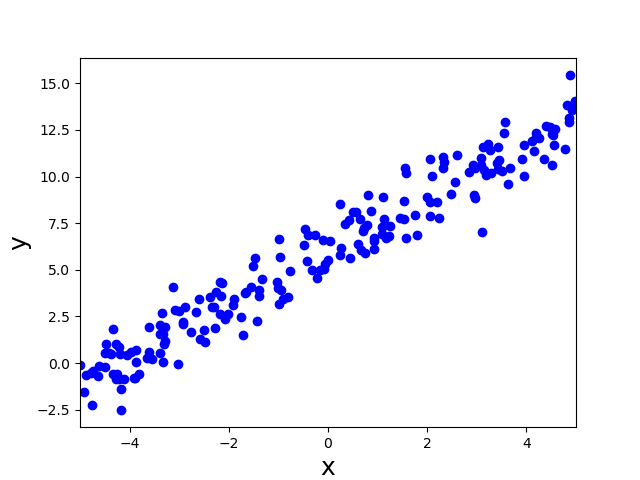

In [30]:
# 不要修改这里！
%matplotlib notebook
from helper import *

X,Y = generatePoints2D(seed)
vs_scatter_2d(X, Y)

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

<IPython.core.display.Javascript object>


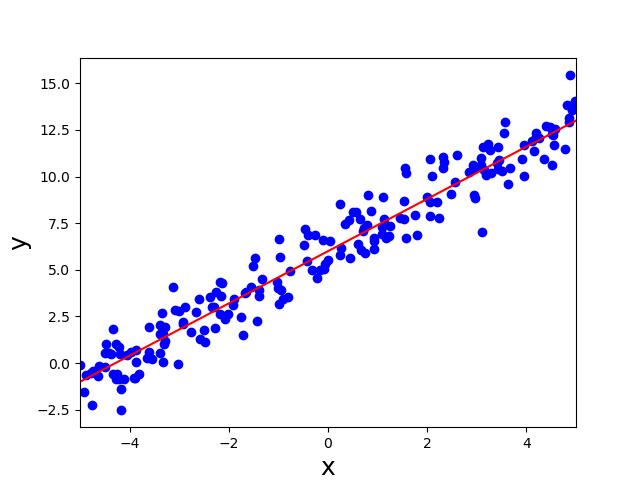

In [31]:
#TODO 请选择最适合的直线 y = mx + b
m1 =1.4
b1 = 6

# 不要修改这里！
vs_scatter_2d(X, Y, m1, b1)

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [32]:
# TODO 实现以下函数并输出所选直线的MSE
def calculateMSE2D(X,Y,m,b):
    sum = 0
    for i in range(len(X)):
        sum += (Y[i]-m*X[i]-b)*(Y[i]-m*X[i]-b)
    return sum/len(X)

# TODO 检查这里的结果, 如果你上面猜测的直线准确, 这里的输出会在1.5以内
print(calculateMSE2D(X,Y,m1,b1))

1.061562025965682


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数
     
目标函数 E为     

$
E = \frac{9}{2}\ -11m -5b+7m^2+6mb+\frac{3}{2}b^2
$      
二元二次方程组      
$$
\begin{cases}
\displaystyle
-5+6m+3b =0 \\
\\
\displaystyle
-11+14m+6b =0 \\
\end{cases}
$$  
最优参数：
$$
\begin{cases}
\displaystyle
m= \frac{1}{2}\\
\\
\displaystyle
b= \frac{2}{3} \\
\end{cases}
$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:      
左侧：      
$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = \begin{bmatrix}
    {-x_1(y1 - mx_1 - b)-x_2(y_2 - mx_2 - b)+...-x_n(y_n-mx_n-b)} \\
    {-(y_1 - mx_1 - b)  -(y_2 - mx_2 - b)   +...-(y_n - mx_n - b)}
\end{bmatrix}
$  


$  --> $
$\begin{bmatrix}
  x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
  \end{bmatrix}$$\begin{bmatrix}
  mx_1 + b - y_1 \\
   mx_2 + b - y_2  \\
   ...
   \\
   mx_n + b - y_n\\ 
  \end{bmatrix}$ 
  
  
 $  --> $
$\begin{bmatrix}
  x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
  \end{bmatrix}$$(\begin{bmatrix}
  mx_1 + b \\
   mx_2 + b  \\
   ...
   \\
   mx_n + b\\ 
  \end{bmatrix}$    -    $\begin{bmatrix}
 y_1\\
   y_2 \\
   ...\\
   y_n\\
  \end{bmatrix}$  )    
   
  
 $  --> $
 $\begin{bmatrix}
  x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
  \end{bmatrix}$$(\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix}$ $\begin{bmatrix}
    m \\
    b \\
\end{bmatrix}$  -    $\begin{bmatrix}
 y_1\\
   y_2 \\
   ...\\
   y_n\\
  \end{bmatrix}$  )  
  
  
右侧：       
X^TXh - X^TY  =  X^T(Xh -Y)
  
 $  --> $
 $\begin{bmatrix}
  x_1 & x_2 & ... & x_n \\
    1 & 1 & ... & 1 \\
  \end{bmatrix}$$(\begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix}$ $\begin{bmatrix}
    m \\
    b \\
\end{bmatrix}$  -    $\begin{bmatrix}
 y_1\\
   y_2 \\
   ...\\
   y_n\\
  \end{bmatrix}$  )  
  
因为左侧等于右侧，所以$\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix}$ = X^TXh - X^TY
成立

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [73]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：线性回归的系数(如上面所说的 m, b)
'''
def linearRegression2D(X,Y):
    #X矩阵
    x_num = [[1]] * len(X) 
    Xm =[[x]  for x in X]
    #构造X矩阵的增广矩阵
    Am = augmentMatrix(xm, x_num)
    Xt = transpose(Am)
    #X转置与X乘积
    Ax = matxMultiply(Xt,Am)
    #Y矩阵
    Ym =[[y]  for y in Y]
    #Y矩阵与X转置的乘积
    Yx = matxMultiply(Xt,Ym)
    result = gj_Solve(Ax, Yx, decPts=4, epsilon=1.0e-16)
    return result[0][0],result[1][0]  
    #return 0.,0.

In [74]:
# 请不要修改下面的代码
m2,b2 = linearRegression2D(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

1.419514025598955 6.047057384195661


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

<IPython.core.display.Javascript object>


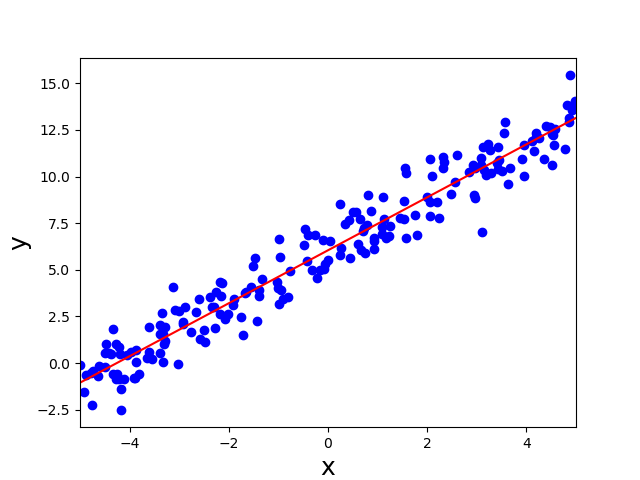

1.0561863405872098


In [75]:
## 请不要修改下面的代码
vs_scatter_2d(X, Y, m2, b2)
print(calculateMSE2D(X,Y,m2,b2))

## Bonus !!!
如果你的高斯约当消元法通过了单元测试, 那么它将能够解决多维的回归问题  
你将会在更高维度考验你的线性回归实现

<IPython.core.display.Javascript object>


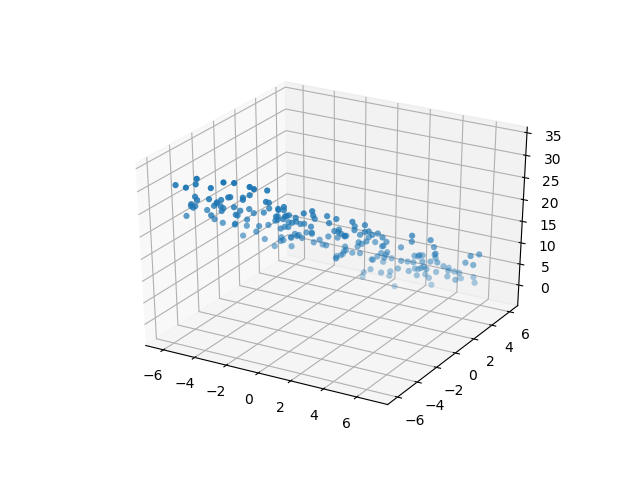

In [79]:
# 生成三维的数据点
X_3d, Y_3d = generatePoints3D(seed)
vs_scatter_3d(X_3d, Y_3d)

你的线性回归是否能够对付三维的情况?

In [134]:
def linearRegression(X,Y):
    x_num = [[1]] * len(X) 
   # Xm =[[x]  for x in X]
    #构造X矩阵的增广矩阵
    Am = augmentMatrix(X, x_num)
    Xt = transpose(Am)
    #X转置与X乘积
    Ax = matxMultiply(Xt,Am)
    #Y矩阵
    Ym =[[y]  for y in Y]
    #Y矩阵与X转置的乘积
    Yx = matxMultiply(Xt,Ym)
    result = gj_Solve(Ax, Yx, decPts=4, epsilon=1.0e-16)
    '''
    这里是否有简便方法，之前写过一个，但是忘记了，请老师批注简便方法
    '''
    fina = [[1]] * len(result) 
    for i in range(len(result)):
        fina[i] = result[i][0]
    return fina

<IPython.core.display.Javascript object>


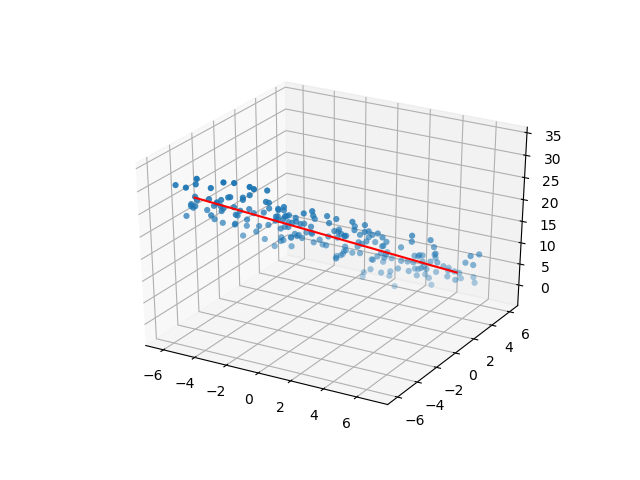

In [135]:
coeff = linearRegression(X_3d, Y_3d)
vs_scatter_3d(X_3d, Y_3d, coeff)